In [1]:
cd ../

/home/noahb/workspace/fv3net


In [2]:
from scipy.interpolate import interp1d
from metpy.interpolate import interpolate_1d

import xarray as xr
import matplotlib.pyplot as plt

data_2d = xr.open_zarr("data/interim/2019-07-17-GFDL_FV3_DYAMOND_0.25deg_15minute_2d.zarr/")
data_3d = xr.open_zarr("data/interim/2019-07-17-GFDL_FV3_DYAMOND_0.25deg_15minute_3d.zarr/")

In [3]:
pressure_grid = data_3d.plev
pressure_on_levs = data_3d.pres
height_on_pressure_grid = data_3d.h_plev

location = (0, slice(None), 0, 10)

In [4]:
pressure_grid

<xarray.DataArray 'plev' (plev: 31)>
array([   1.,    2.,    3.,    5.,    7.,   10.,   20.,   30.,   50.,   70.,
        100.,  150.,  200.,  250.,  300.,  350.,  400.,  450.,  500.,  550.,
        600.,  650.,  700.,  750.,  800.,  850.,  900.,  925.,  950.,  975.,
       1000.], dtype=float32)
Coordinates:
  * plev     (plev) float32 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1000.0
Attributes:
    cartesian_axis:  Z
    long_name:       actual pressure level
    positive:        down
    units:           mb

In [5]:
pressure_on_levs[location].load()

<xarray.DataArray 'pres' (pfull: 79)>
array([  451.35605,   830.03265,  1245.1748 ,  1674.3597 ,  2104.3933 ,
        2533.8264 ,  2967.4634 ,  3414.702  ,  3886.8945 ,  4396.5854 ,
        4952.4326 ,  5556.1543 ,  6209.273  ,  6913.177  ,  7668.9453 ,
        8477.543  ,  9339.708  , 10255.971  , 11209.74   , 12168.857  ,
       13120.372  , 14069.497  , 15020.361  , 15976.062  , 16939.387  ,
       17912.71   , 18896.846  , 19893.648  , 20903.129  , 21926.412  ,
       22962.906  , 24013.059  , 25076.27   , 26152.049  , 27239.57   ,
       28338.375  , 29447.217  , 30565.322  , 31691.602  , 32824.62   ,
       33963.51   , 35107.477  , 36254.43   , 37404.082  , 38554.348  ,
       39704.9    , 40853.67   , 42000.234  , 43142.945  , 44280.902  ,
       45413.605  , 46538.47   , 47656.457  , 48766.92   , 49864.844  ,
       50952.812  , 52024.027  , 53081.85   , 54117.93   , 55135.08   ,
       56125.934  , 57093.562  , 58030.074  , 58940.156  , 59813.105  ,
       60659.285  , 61466.

We can see that that the highest pressure at some locations lies outside the range of the pressure_grid. Therefore, I think we should avoid using the pressure coordinates. And try to get interpolated heights for the model levels.

In [6]:
h = height_on_pressure_grid[location].values
p = data_3d.plev.values
p_on_model_grid = data_3d.pres[location].values/100
sigma_on_model_grid = data_3d.pfull.values

sigma_on_pressure_grid = interpolate_1d(p, p_on_model_grid, sigma_on_model_grid)
height_on_model_grid = interpolate_1d(sigma_on_model_grid, sigma_on_pressure_grid, h)

/home/noahb/.conda/envs/uwnet/lib/python3.7/site-packages/metpy/interpolate/one_dimension.py:139: UserWarning: Interpolation point out of data bounds encountered
  warnings.warn('Interpolation point out of data bounds encountered')
/home/noahb/.conda/envs/uwnet/lib/python3.7/site-packages/metpy/interpolate/one_dimension.py:149: UserWarning: Interpolation point out of data bounds encountered
  warnings.warn('Interpolation point out of data bounds encountered')


In [7]:
sigma_on_pressure_grid

array([        nan,         nan,         nan,   5.000277 ,   7.0004396,
        10.0004225,  19.999876 ,  30.000217 ,  50.000275 ,  70.00027  ,
       100.00045  , 156.234    , 224.91052  , 300.1885   , 378.81235  ,
       459.2235   , 540.6974   , 622.8371   , 705.4245   , 788.28687  ,
       871.4236   , 954.84454  ,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan], dtype=float32)

In [8]:
height_on_model_grid

array([       nan, 28184.73  , 26059.104 , 24411.215 , 22934.463 ,
       22002.566 , 21061.605 , 20425.947 , 19782.535 , 19088.037 ,
       18330.629 , 17762.346 , 17171.088 , 16533.883 , 16020.976 ,
       15495.994 , 14936.247 , 14403.532 , 14009.023 , 13592.418 ,
       13153.818 , 12693.382 , 12215.558 , 11915.274 , 11602.601 ,
       11277.849 , 10941.381 , 10593.588 , 10325.068 , 10059.683 ,
        9787.18  ,  9507.931 ,  9226.459 ,  8993.508 ,  8756.162 ,
        8514.79  ,  8269.722 ,  8039.5923,  7824.7827,  7607.753 ,
        7388.8013,  7170.746 ,  6975.5894,  6779.556 ,  6582.8867,
        6385.8247,  6204.166 ,  6027.962 ,  5852.036 ,  5676.6006,
        5507.6484,  5349.6147,  5192.4966,  5036.432 ,  4881.658 ,
        4739.9785,  4601.687 ,  4465.4346,  4331.546 ,  4201.7554,
        4083.9087,  3969.0527,  3857.4912,  3749.5151,  3645.3154,
        3551.802 ,  3464.1692,  3380.6775,  3301.6194,  3227.1414,
        3157.5115,  3092.831 ,        nan,        nan,        

Text(0, 0.5, 'p (mb)')

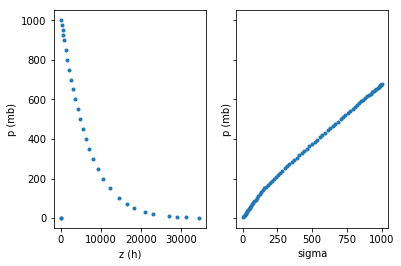

In [9]:
fig, (a,b ) = plt.subplots(1, 2, sharey=True)

a.plot(h, p, '.')
a.set_xlabel('z (h)')
a.set_ylabel('p (mb)')

b.plot(sigma_on_model_grid, pressure_on_levs[location]/100, '.')
b.set_xlabel('sigma')
b.set_ylabel('p (mb)')

In [10]:
height_on_sigma = interp1d(pressure_grid, height_on_pressure_grid[location])(pressure_on_levs[location]/100)

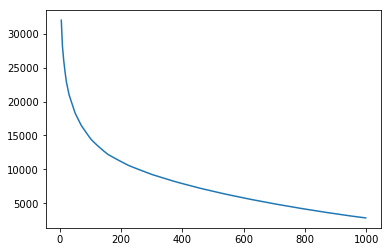

In [11]:
plt.plot(sigma_on_model_grid, height_on_sigma)

In [12]:
from numba import jit

In [13]:
def interpolate_1d_scipy(x, xp, arg):
    """simple test case"""
    return interp1d(xp, arg)(x)



@jit
def _interpolate_1d_2d(x, xp, arr):
    """
    Args:
      x: 2D
      xp: 1D
      arr: 2D
    
    Returns:
      output with same shape as x
    """
    
    interpolated_shape = x.shape
    assert x.shape[0] == arr.shape[0]
    n = x.shape[1]
    output = np.zeros_like(x)
    
    
    for k in range(arr.shape[0]):
        old_j = 0
        for i in range(n):
            # find lower boun
            for j in range(old_j, arr.shape[1]-1):
                old_j = j
                if xp[j+1] > x[k,i] >= xp[j]:
                    break
            # this will do linear extrapolation 
            alpha = (x[k,i] - xp[j])/(xp[j+1]-xp[j])
            output[k, i] = arr[k,j+1] * alpha +arr[k,j] * (1-alpha)
    return output    

%timeit alpha = _interpolate_1d_2d(x.reshape((1,-1)), xp, arr.reshape((1, -1))).ravel()
%timeit expected= interpolate_1d_scipy(x, xp, arr)

np.testing.assert_allclose(alpha, expected, atol=1e-2)

The numba interpolation is much faster

In [14]:
def interpolate_1d_nd_target(x, xp, arr, axis=-1):
    """
    
    Args:
      x: p(sigma)
      xp: p
      arr: data on levels xp.
    Returns:
      arr(sigma)
    """
    x = np.swapaxes(x, axis, -1)
    arr = np.swapaxes(arr, axis, -1)
    
    xreshaped = x.reshape((-1, x.shape[-1]))
    arrreshaped = arr.reshape((-1, arr.shape[-1]))

    if axis < 0:
        axis = arr.ndim+axis
    matrix = _interpolate_1d_2d(xreshaped, xp, arrreshaped)
    reshaped = matrix.reshape(x.shape)
    return reshaped.swapaxes(axis, -1)

    

In [15]:
location = [0, slice(None), slice(None), slice(None)]

args = data_3d.pres.values[location]/100, data_3d.plev.values, data_3d.h_plev.values[location]

/home/noahb/.conda/envs/uwnet/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
height_on_sigma =  interpolate_1d_nd_target(*args, axis=0)

Heights of the top sigma level:

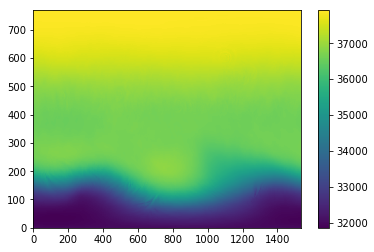

In [17]:
plt.pcolormesh(height_on_sigma[0])
plt.colorbar()

Heights of the bottom sigma level

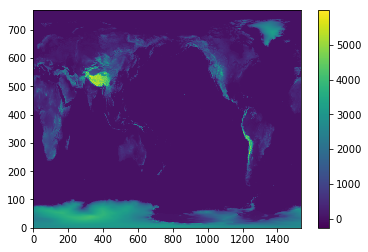

In [18]:
plt.pcolormesh(height_on_sigma[-1])
plt.colorbar()